<a href="https://colab.research.google.com/github/Imran1hp/Waste-Cassification/blob/main/Waste_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import os

In [3]:
import opendatasets as od

In [4]:
data_url ="https://www.kaggle.com/datasets/wasifmahmood01/custom-waste-classification-dataset"
od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imranlaskar123
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/wasifmahmood01/custom-waste-classification-dataset


100%|██████████| 5.39G/5.39G [02:12<00:00, 43.6MB/s]

In [17]:
os.listdir()


['.config', 'custom-waste-classification-dataset', 'sample_data']

In [18]:
from pathlib import Path
folder_name = 'wastes'
data_path = Path("custom-waste-classification-dataset/")
img_path = data_path/folder_name
img_path

PosixPath('custom-waste-classification-dataset/wastes')

In [32]:
def walk_through_data(dir_path):
  for dirpath ,dirnames ,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [20]:
walk_through_data(img_path)

There are 2 directories and 0 images in custom-waste-classification-dataset/wastes 
There are 9 directories and 0 images in custom-waste-classification-dataset/wastes/train 
There are 0 directories and 420 images in custom-waste-classification-dataset/wastes/train/light bulbs 
There are 0 directories and 1231 images in custom-waste-classification-dataset/wastes/train/metal waste 
There are 0 directories and 1248 images in custom-waste-classification-dataset/wastes/train/E-waste 
There are 0 directories and 1370 images in custom-waste-classification-dataset/wastes/train/paper waste 
There are 0 directories and 1022 images in custom-waste-classification-dataset/wastes/train/glass waste 
There are 0 directories and 848 images in custom-waste-classification-dataset/wastes/train/battery waste 
There are 0 directories and 1315 images in custom-waste-classification-dataset/wastes/train/plastic waste 
There are 0 directories and 871 images in custom-waste-classification-dataset/wastes/train/au

In [21]:
train_dir = img_path/"train"
test_dir = img_path/"test"

In [10]:
train_dir , test_dir

(PosixPath('custom-waste-classification-dataset/wastes/train'),
 PosixPath('custom-waste-classification-dataset/wastes/test'))

In [22]:
img_path

PosixPath('custom-waste-classification-dataset/wastes')

##Opena random image using file path

Image path custom-waste-classification-dataset/wastes/train/E-waste/E-waste (869).jpg
Image Class: E-waste
Image Height: 432
Image width: 663


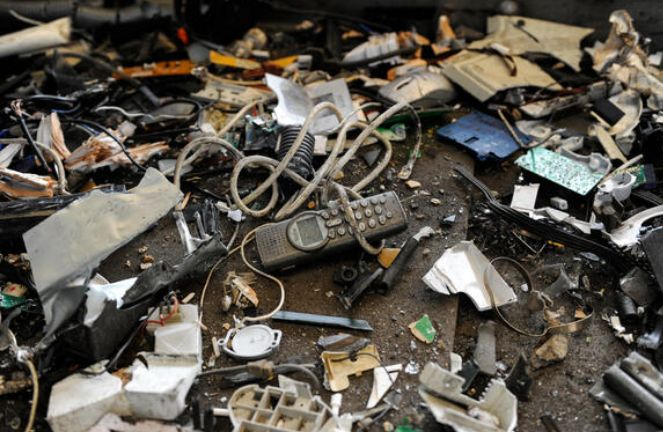

In [28]:
import random
from  PIL import Image
img_path_list = list(img_path.glob("*/*/*.jpg"))
rand_img_path = random.choice(img_path_list)
class_name = rand_img_path.parent.stem
img = Image.open(rand_img_path)
print(f"Image path {rand_img_path}")
print(f"Image Class: {class_name}")
print(f"Image Height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(662.5), np.float64(431.5), np.float64(-0.5))

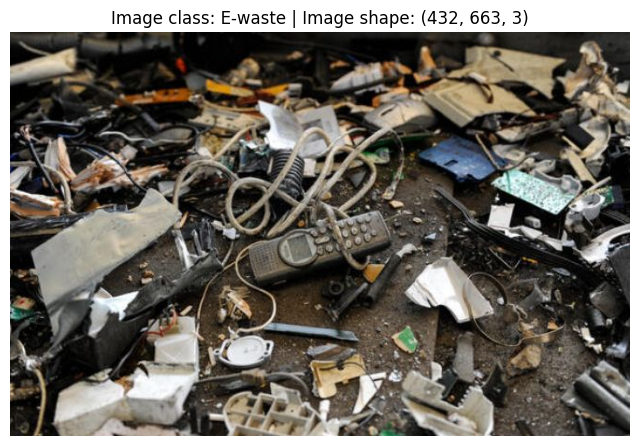

In [31]:
import matplotlib.pyplot as plt
import numpy as np


img_array = np.array(img)

plt.figure(figsize=(8,7))

plt.imshow(img_array)
plt.title(f"Image class: {class_name} | Image shape: {img_array.shape}")
plt.axis(False)


In [29]:
from torchvision import datasets , transforms
